# Anomaly Detection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os

In [2]:
os_path_base = "/kaggle/input/ieee-fraud-detection"

#### 3. Load the CSV files as ‘train_transaction.csv’

In [3]:
path_data = os.path.join(os_path_base, "train_transaction.csv")
df = pd.read_csv(path_data)
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 4. From train_transaction keep 10000 entries: the first 9700 non-fraud entries and the first 300 fraud entries in dataset reduced_transaction_df


In [4]:
df_non_fraud = df[df["isFraud"] == 0][:9700]
print(df_non_fraud.shape)
df_non_fraud.head(3)

(9700, 394)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_fraud = df[df["isFraud"] == 1][:300]
print(df_fraud.shape)
df_fraud.head(3)

(300, 394)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
203,2987203,1,89760,445.000,W,18268,583.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,2987240,1,90193,37.098,C,13413,103.0,185.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,2987243,1,90246,37.098,C,13413,103.0,185.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
reduced_transaction_df = pd.concat([df_non_fraud, df_fraud], ignore_index=True)
reduced_transaction_df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2998003,1,330244,54.0,W,3507,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,2998019,1,330423,150.0,H,3821,111.0,150.0,mastercard,219.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,2998035,1,330738,171.0,W,4993,553.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,2998043,1,330852,39.0,W,16727,111.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **I/ Data set observation**

#### 5. Print the head of the dataset


In [7]:
reduced_transaction_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 6. List following information for the training set
1. Column number
2. Column names (all should be visible in a line, not in a column)
3. Length of the data set
4. For each column name, its type (show all values)

In [8]:
column_number = len(reduced_transaction_df.columns)
column_number

394

In [9]:
column_names = list(reduced_transaction_df.columns)
print(', '.join(map(str, column_names)))

TransactionID, isFraud, TransactionDT, TransactionAmt, ProductCD, card1, card2, card3, card4, card5, card6, addr1, addr2, dist1, dist2, P_emaildomain, R_emaildomain, C1, C2, C3, C4, C5, C6, C7, C8, C9, C10, C11, C12, C13, C14, D1, D2, D3, D4, D5, D6, D7, D8, D9, D10, D11, D12, D13, D14, D15, M1, M2, M3, M4, M5, M6, M7, M8, M9, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, V29, V30, V31, V32, V33, V34, V35, V36, V37, V38, V39, V40, V41, V42, V43, V44, V45, V46, V47, V48, V49, V50, V51, V52, V53, V54, V55, V56, V57, V58, V59, V60, V61, V62, V63, V64, V65, V66, V67, V68, V69, V70, V71, V72, V73, V74, V75, V76, V77, V78, V79, V80, V81, V82, V83, V84, V85, V86, V87, V88, V89, V90, V91, V92, V93, V94, V95, V96, V97, V98, V99, V100, V101, V102, V103, V104, V105, V106, V107, V108, V109, V110, V111, V112, V113, V114, V115, V116, V117, V118, V119, V120, V121, V122, V123, V124, V125, V126, V127, V128, V129, V130,

In [10]:
df_len = reduced_transaction_df.shape[0]
df_len

10000

In [11]:
column_types = [reduced_transaction_df[col].dtypes.name for col in column_names]
col_print = 5
for i in range(len(column_names) // col_print):
    for j in range(col_print):
        print(f"{column_names[i*col_print+j]}: {column_types[i*col_print+j]}", end="\t\t")
    print()

TransactionID: int64		isFraud: int64		TransactionDT: int64		TransactionAmt: float64		ProductCD: object		
card1: int64		card2: float64		card3: float64		card4: object		card5: float64		
card6: object		addr1: float64		addr2: float64		dist1: float64		dist2: float64		
P_emaildomain: object		R_emaildomain: object		C1: float64		C2: float64		C3: float64		
C4: float64		C5: float64		C6: float64		C7: float64		C8: float64		
C9: float64		C10: float64		C11: float64		C12: float64		C13: float64		
C14: float64		D1: float64		D2: float64		D3: float64		D4: float64		
D5: float64		D6: float64		D7: float64		D8: float64		D9: float64		
D10: float64		D11: float64		D12: float64		D13: float64		D14: float64		
D15: float64		M1: object		M2: object		M3: object		M4: object		
M5: object		M6: object		M7: object		M8: object		M9: object		
V1: float64		V2: float64		V3: float64		V4: float64		V5: float64		
V6: float64		V7: float64		V8: float64		V9: float64		V10: float64		
V11: float64		V12: float64		V13: float64		V14: float64

#### 7. Control the correct extraction of transaction: number of non-fraudulent transactions, number of fraudulent transactions, rate of fraudulent transactions

In [12]:
nb_nonfraud = reduced_transaction_df[reduced_transaction_df["isFraud"] == 0].shape[0]
nb_fraud = reduced_transaction_df[reduced_transaction_df["isFraud"] == 1].shape[0]
rate_fraud = nb_fraud / df_len

print(f"number of non-fraudulent transactions : {nb_nonfraud}")
print(f"number of fraudulent transactions : {nb_fraud}")
print(f"rate of fraudulent transactions : {rate_fraud}")

number of non-fraudulent transactions : 9700
number of fraudulent transactions : 300
rate of fraudulent transactions : 0.03


#### 8. Which columns are categories? List them (show all column names); extract and show existing values.

In [13]:
category_columns = ['ProductCD', 'card1', 'card2', 'card3',
                    'card5', 'addr1', 'addr2', 'P_emaildomain',
                    'R_emaildomain', 'M1','M2', 'M3', 'M4',
                    'M5', 'M6', 'M7', 'M8', 'M9']
print("Columns that are categories:", category_columns)

Columns that are categories: ['ProductCD', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']


#### 9. Which columns are numeric? List them (show all column names); extract and show min, max, mean, median and standard deviation values

In [14]:
numeric_columns = reduced_transaction_df.select_dtypes(include='number').columns
print("Columns that are categories:", numeric_columns.values)

Columns that are categories: ['TransactionID' 'isFraud' 'TransactionDT' 'TransactionAmt' 'card1'
 'card2' 'card3' 'card5' 'addr1' 'addr2' 'dist1' 'dist2' 'C1' 'C2' 'C3'
 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'C10' 'C11' 'C12' 'C13' 'C14' 'D1' 'D2'
 'D3' 'D4' 'D5' 'D6' 'D7' 'D8' 'D9' 'D10' 'D11' 'D12' 'D13' 'D14' 'D15'
 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12' 'V13'
 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24' 'V25'
 'V26' 'V27' 'V28' 'V29' 'V30' 'V31' 'V32' 'V33' 'V34' 'V35' 'V36' 'V37'
 'V38' 'V39' 'V40' 'V41' 'V42' 'V43' 'V44' 'V45' 'V46' 'V47' 'V48' 'V49'
 'V50' 'V51' 'V52' 'V53' 'V54' 'V55' 'V56' 'V57' 'V58' 'V59' 'V60' 'V61'
 'V62' 'V63' 'V64' 'V65' 'V66' 'V67' 'V68' 'V69' 'V70' 'V71' 'V72' 'V73'
 'V74' 'V75' 'V76' 'V77' 'V78' 'V79' 'V80' 'V81' 'V82' 'V83' 'V84' 'V85'
 'V86' 'V87' 'V88' 'V89' 'V90' 'V91' 'V92' 'V93' 'V94' 'V95' 'V96' 'V97'
 'V98' 'V99' 'V100' 'V101' 'V102' 'V103' 'V104' 'V105' 'V106' 'V107'
 'V108' 'V109' 'V110' 'V111' 'V112' 'V

#### 10. For each column, print the rate of undefined values (NaN for numeric)

In [18]:
def compute_rate_nan(df, printable=True):
    nan_rates = []
    column_names = list(df.columns)
    
    for i, col in zip(range(1, len(column_names)+1), column_names):
        nan_rate = df[df[col].isna()].shape[0] / df.shape[0]
        if (printable):
            print(f"{col}: {nan_rate}", end="\t")
        if (i % 5 == 0 and printable):
            print()
            
        nan_rates.append(nan_rate)
    return nan_rates

rate_nan = compute_rate_nan(reduced_transaction_df)

TransactionID: 0.0	isFraud: 0.0	TransactionDT: 0.0	TransactionAmt: 0.0	ProductCD: 0.0	
card1: 0.0	card2: 0.0121	card3: 0.0001	card4: 0.0001	card5: 0.0023	
card6: 0.0001	addr1: 0.0915	addr2: 0.0915	dist1: 0.6618	dist2: 0.9625	
P_emaildomain: 0.2099	R_emaildomain: 0.8366	C1: 0.0	C2: 0.0	C3: 0.0	
C4: 0.0	C5: 0.0	C6: 0.0	C7: 0.0	C8: 0.0	
C9: 0.0	C10: 0.0	C11: 0.0	C12: 0.0	C13: 0.0	
C14: 0.0	D1: 0.0	D2: 0.4585	D3: 0.4283	D4: 0.6232	
D5: 0.7234	D6: 0.9507	D7: 0.9775	D8: 0.8898	D9: 0.8898	
D10: 0.1268	D11: 0.7732	D12: 0.9593	D13: 0.972	D14: 0.9544	
D15: 0.494	M1: 0.5794	M2: 0.5794	M3: 0.5794	M4: 0.4879	
M5: 0.5788	M6: 0.2579	M7: 0.7868	M8: 0.7868	M9: 0.7868	
V1: 0.7732	V2: 0.7732	V3: 0.7732	V4: 0.7732	V5: 0.7732	
V6: 0.7732	V7: 0.7732	V8: 0.7732	V9: 0.7732	V10: 0.7732	
V11: 0.7732	V12: 0.1269	V13: 0.1269	V14: 0.1269	V15: 0.1269	
V16: 0.1269	V17: 0.1269	V18: 0.1269	V19: 0.1269	V20: 0.1269	
V21: 0.1269	V22: 0.1269	V23: 0.1269	V24: 0.1269	V25: 0.1269	
V26: 0.1269	V27: 0.1269	V28: 0.1269	V29: 0.1

#### 11. For each numerical column, print the rate of zero (0) value
Typ:
- First transform the content of the DataFrame column into a list before counting the quantity of a given item : <br>
```python
zero_number = list(reduced_dtransac[colunm]).count(0)
```

In [19]:
for i, col in zip(range(1, len(column_names)+1), column_names):
    rate_zero = list(reduced_transaction_df[col]).count(0) / df_len
    print(f"{col}: {rate_zero}", end="\t")
    if (i % 5 == 0):
        print()

TransactionID: 0.0	isFraud: 0.97	TransactionDT: 0.0	TransactionAmt: 0.0	ProductCD: 0.0	
card1: 0.0	card2: 0.0	card3: 0.0	card4: 0.0	card5: 0.0	
card6: 0.0	addr1: 0.0	addr2: 0.0	dist1: 0.0313	dist2: 0.0036	
P_emaildomain: 0.0	R_emaildomain: 0.0	C1: 0.0007	C2: 0.0003	C3: 0.991	
C4: 0.8347	C5: 0.6029	C6: 0.1013	C7: 0.9094	C8: 0.7806	
C9: 0.2987	C10: 0.7899	C11: 0.0005	C12: 0.9087	C13: 0.0497	
C14: 0.0503	D1: 0.4531	D2: 0.0221	D3: 0.1317	D4: 0.1105	
D5: 0.0492	D6: 0.0315	D7: 0.0073	D8: 0.0015	D9: 0.0075	
D10: 0.3396	D11: 0.0667	D12: 0.0275	D13: 0.0231	D14: 0.0347	
D15: 0.1184	M1: 0.0	M2: 0.0	M3: 0.0	M4: 0.0	
M5: 0.0	M6: 0.0	M7: 0.0	M8: 0.0	M9: 0.0	
V1: 0.0004	V2: 0.0004	V3: 0.0004	V4: 0.0552	V5: 0.0529	
V6: 0.0004	V7: 0.0004	V8: 0.0004	V9: 0.0004	V10: 0.1105	
V11: 0.1099	V12: 0.524	V13: 0.4998	V14: 0.0002	V15: 0.8385	
V16: 0.8385	V17: 0.8364	V18: 0.8364	V19: 0.3874	V20: 0.3797	
V21: 0.8369	V22: 0.8369	V23: 0.0005	V24: 0.0005	V25: 0.2209	
V26: 0.2205	V27: 0.8718	V28: 0.8718	V29: 0.5782	V30:

## **II/ Data set visualisation**

#### 12. Visualise the dataset using dimensions: 'TransactionAmt', 'card1','addr1'.
Typs:
- Create a dedicated visualisation function
```python
show3D_transation_data(transac_dataset, x_axis_name, y_axis_name, z_axis_name)
```
- Use code from Anomaly Detection_Use_Case.

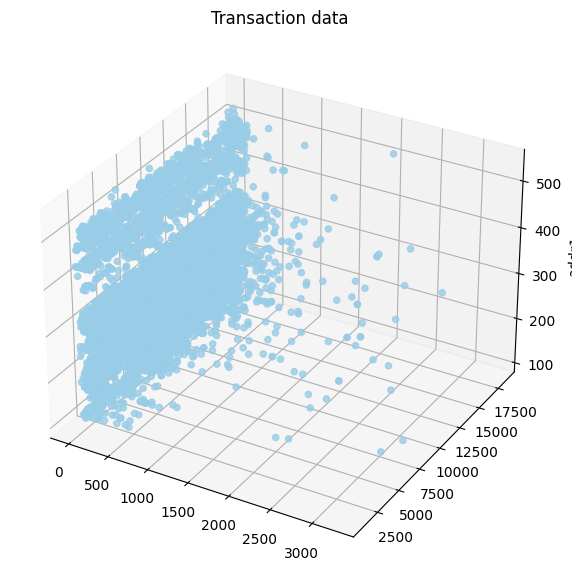

In [20]:
def show3D_transaction_data(transac_dataset, x_axis_name, y_axis_name, z_axis_name, figsize=(10, 7)):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')
    
    ax.set_title("Transaction data")
    ax.scatter(transac_dataset[x_axis_name], transac_dataset[y_axis_name], transac_dataset[z_axis_name],
               color=(0.6, 0.8, 0.9), marker='o', alpha=0.8)
    ax.set_zlabel(z_axis_name)
    
    plt.show()
    
show3D_transaction_data(reduced_transaction_df, 'TransactionAmt', 'card1', 'addr1')
                            

#### 13. Create an alternate visualisation function for visualising fraud entries only, in red
```python
show3D_transation_data _fraud_only(transac_dataset, x_axis_name, y_axis_name,
z_axis_name)
```

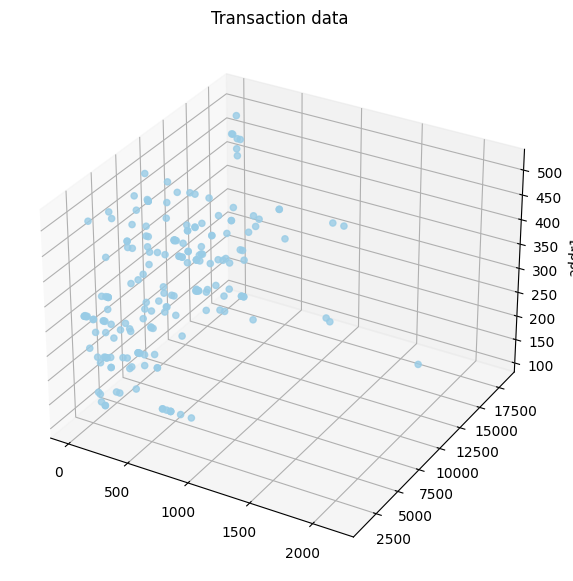

In [21]:
def show3D_transation_data_fraud_only(transac_dataset, x_axis_name, y_axis_name,
z_axis_name, figsize=(10, 7)):
    transac_fraud = transac_dataset[transac_dataset["isFraud"] == 1]
    show3D_transaction_data(transac_fraud, x_axis_name, y_axis_name, z_axis_name, figsize)
    
show3D_transation_data_fraud_only(reduced_transaction_df, 'TransactionAmt', 'card1', 'addr1')

## **III/ Data cleaning**

#### 14. Perform one-hot encoding of categorical data

In [22]:
def get_one_hot_encoded_dataframe(df):
    """
    Retrieves the one hot encoded dataframe
    Args :
        dataframe: input dataframe
    Returns :
        The associated one hot encoded dataframe
    """
    if (df is None):
        return None
    
    return pd.get_dummies(df)

one_hot_categorical = get_one_hot_encoded_dataframe(reduced_transaction_df[category_columns])
one_hot_categorical

,card1,card2,card3,card5,addr1,addr2,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,...,M5_F,M5_T,M6_F,M6_T,M7_F,M7_T,M8_F,M8_T,M9_F,M9_T
0,13926,NaN,150.0,142.0,315.0,87.0,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
1,2755,404.0,150.0,102.0,325.0,87.0,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,4663,490.0,150.0,166.0,330.0,87.0,False,False,False,False,...,True,False,True,False,True,False,True,False,True,False
3,18132,567.0,150.0,117.0,476.0,87.0,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
4,4497,514.0,150.0,102.0,420.0,87.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3507,NaN,150.0,226.0,204.0,87.0,False,False,False,False,...,False,True,False,True,True,False,True,False,False,True
9996,3821,111.0,150.0,219.0,264.0,87.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
9997,4993,553.0,150.0,226.0,123.0,87.0,False,False,False,False,...,False,True,False,True,False,True,False,True,False,True
9998,16727,111.0,150.0,226.0,204.0,87.0,False,False,False,False,...,False,True,True,False,True,False,True,False,False,True


Adding the one_categories to the dataframe

In [62]:
transaction_df = reduced_transaction_df.drop(columns=category_columns)
transaction_df = pd.concat([transaction_df, one_hot_categorical], axis=1)
transaction_df.shape

(10000, 492)

#### 15. Remove NaN (Not a number) values by imputation of the mean of the column
Typs:
- Do not forget to transform the resulting data structure in Pandas Dataframe again
- Do not forget to keep the column names for the Dataframe

In [64]:
def remove_nan_through_mean_imputation(df):
    """
    Remove NaN (Not a Number) entries through mean imputation
    Args :
        dataframe: input dataframe
    Return :
        the dataframe with  NaN (Not a Number) entries replaced using mean imputation
    """
    if (df is None):
        return None
    
    object_columns = df.select_dtypes(include=["object"]).columns

    for col in object_columns:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
    
    numeric_columns = df.select_dtypes(include='number').columns
    df = df.fillna(df[numeric_columns].mean())
    #df = df.fillna(df.mean())
    return df.dropna()

transaction_df = remove_nan_through_mean_imputation(transaction_df)
transaction_df

,TransactionID,isFraud,TransactionDT,TransactionAmt,card4,card6,dist1,dist2,C1,C2,...,M5_F,M5_T,M6_F,M6_T,M7_F,M7_T,M8_F,M8_T,M9_F,M9_T
0,2987000,0,86400,68.5,discover,credit,19.000000,292.621333,1.0,1.0,...,True,False,False,True,False,False,False,False,False,False
1,2987001,0,86401,29.0,mastercard,credit,116.262567,292.621333,1.0,1.0,...,False,True,False,True,False,False,False,False,False,False
2,2987002,0,86469,59.0,visa,debit,287.000000,292.621333,1.0,1.0,...,True,False,True,False,True,False,True,False,True,False
3,2987003,0,86499,50.0,mastercard,debit,116.262567,292.621333,2.0,5.0,...,False,True,True,False,False,False,False,False,False,False
4,2987004,0,86506,50.0,mastercard,credit,116.262567,292.621333,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2998003,1,330244,54.0,visa,credit,48.000000,292.621333,3.0,3.0,...,False,True,False,True,True,False,True,False,False,True
9996,2998019,1,330423,150.0,mastercard,credit,116.262567,292.621333,3.0,3.0,...,False,False,False,False,False,False,False,False,False,False
9997,2998035,1,330738,171.0,visa,credit,0.000000,292.621333,3.0,3.0,...,False,True,False,True,False,True,False,True,False,True
9998,2998043,1,330852,39.0,visa,credit,41.000000,292.621333,3.0,3.0,...,False,True,True,False,True,False,True,False,False,True


#### 16. Control that no NaN value remain in the dataframe

In [67]:
rate_nan = np.array(compute_rate_nan(e, printable=False))
assert (rate_nan == np.zeros(rate_nan.shape[0])).all()

rate_nan

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

## **IV/ Outlier detection**

### **Isolation forest**

#### 17. Extract outliers using sklearn.ensemble.IsolationForests, using andoutliers_fraction = 0.03. Control the numbers of outliers.
Typs:
- clf.predict() returns outliers marked as -1
- Add an additional column ‘outliers’ to your dataframe as follows to store outlier status:
```python
X_with_imputed_values_outliers['if_outliers'] = dtransac_outliers
```
- How many outliers found in unsupervised manner are labelled as fraudulent transactions
(‘isFraud’) ?
- Print fraudulent outliers. What do you observe?

#### 18. Create yet another visualisation function for visualising IsolationForest outliers entries only, in red
```python
show3D_transation_data_if_outliers_only(transac_dataset, x_axis_name, y_axis_name,
z_axis_name)
```

### **Local Outlier Factor (LOF)**

#### 19. Extract outliers using sklearn.neighbors. LocalOutlierFactor, using and outliers_fraction = 0.03. Control the numbers of outliers.
Typs:
- clf.predict() returns outliers marked as -1
- Add an additional column ‘lof_outliers’ to your dataframe as follows to store outlier status:
```python
X_with_imputed_values_outliers['lof_outliers'] = lof_outliers
```
- How many outliers found in unsupervised manner are labelled as fraudulent transactions
(‘isFraud’) ?

### 20. Create yet another visualisation function for visualising LOF outliers entries only, in red
```python
show3D_transation_data_lof_outliers_only(transac_dataset, x_axis_name, y_axis_name,
z_axis_name)
```


### **Comparison of IsolationForest and LOF**

#### 21. Control the complementarity between the 2 algorithms
1. How many outliers are common to IsolationForest and LOF?
2. What do you deduce for building unsupervised outlier detectors?